In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [38]:
mon_features= pd.read_csv('../features/modified_datasets/mon_features.csv')
mon_labels = pd.read_csv('../features/modified_datasets/mon_labels.csv')

unmon_features= pd.read_csv('../features/modified_datasets/unmon_features.csv')

In [40]:
mon_features['label'] = mon_labels.values
unmon_features['label'] = -1
features_modified = pd.concat([mon_features, unmon_features], ignore_index=True)

X = features_modified.drop('label', axis=1)
y = features_modified['label']

X

,total_num,total_sum_dir,total_avg,inpkt_num,inpkt_avg,inpkt_sum,inpkt_num_frac_total,inpkt_avg_ordering,inpkt_std_ordering,inpkt_num_frac_outpkt,...,outpkt_num_frac_inpkt,outpkt_sum_firstn,inpkt_std_burst,inpkt_max_burst,inpkt_avg_burst,inpkt_count_burst,outpkt_std_burst,outpkt_max_burst,outpkt_avg_burst,outpkt_count_burst
0,1421,-603648,4.315749,1300,4.292023,5579.63,0.914849,704.106154,398.486335,10.743802,...,0.093077,7.39,17.195458,66,16.666667,78,1.139584,8,1.551282,78
1,518,-183296,4.611815,438,4.673242,2046.88,0.845560,264.406393,150.591146,5.475000,...,0.182648,9.71,12.176200,50,9.319149,47,1.128262,5,1.702128,47
2,1358,-574464,5.488969,1240,5.459452,6769.72,0.913108,668.259677,381.878642,10.508475,...,0.095161,7.83,16.584084,50,16.315789,76,0.978650,6,1.552632,76
3,1446,-615424,5.995512,1324,5.948693,7876.07,0.915629,713.503021,406.205288,10.852459,...,0.092145,11.53,17.252464,70,16.550000,80,0.851102,5,1.525000,80
4,1406,-602112,4.698869,1291,4.663873,6021.06,0.918208,694.740511,395.028889,11.226087,...,0.089078,7.17,16.014144,60,16.341772,79,0.882996,5,1.455696,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,4593,-1928704,12.494690,4180,12.360713,51667.78,0.910081,2270.961722,1337.407077,10.121065,...,0.098804,17.30,16.349985,69,16.328125,256,1.185041,10,1.619608,255
28996,5110,-2158592,13.844609,4663,13.729719,64021.68,0.912524,2505.849024,1450.994832,10.431767,...,0.095861,42.56,18.897256,87,20.724444,225,2.415533,23,1.995536,224
28997,361,-124416,3.568144,302,3.251291,981.89,0.836565,180.175497,101.241755,5.118644,...,0.195364,17.90,12.087057,41,10.785714,28,1.838852,8,2.107143,28
28998,509,-162304,6.892377,413,6.689346,2762.70,0.811395,241.169492,138.848134,4.302083,...,0.232446,20.69,9.963438,42,7.375000,56,1.047348,5,1.714286,56


In [41]:
y

0        0
1        0
2        0
3        0
4        0
        ..
28995   -1
28996   -1
28997   -1
28998   -1
28999   -1
Name: label, Length: 29000, dtype: int64

---
## 1. RF to get feature importance score

In [42]:
clf = RandomForestClassifier(n_estimators=20, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=0)

In [43]:
clf.fit(X, y)
imp_score=clf.feature_importances_

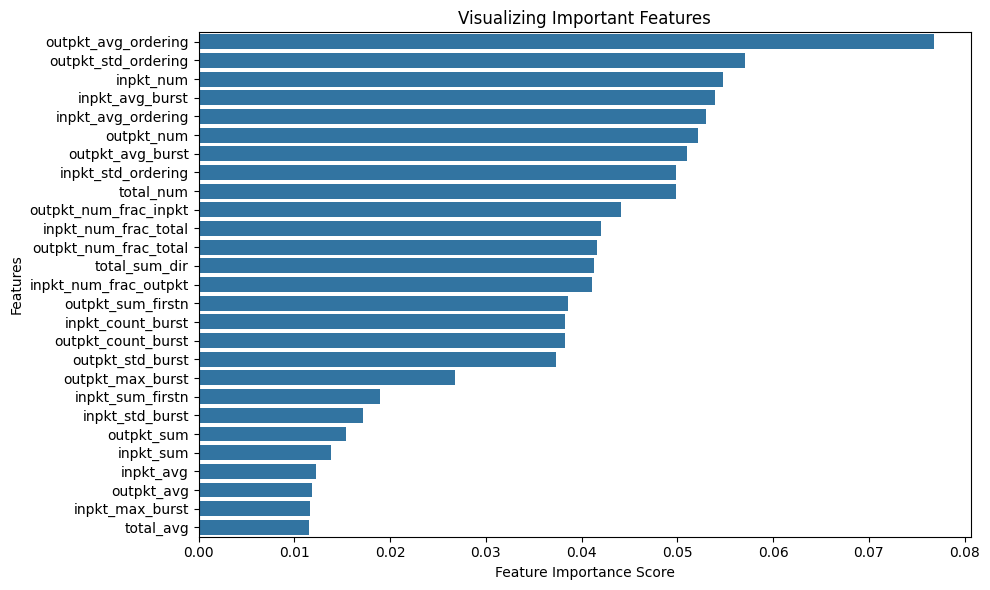

In [45]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout() 

In [46]:
top_indices=np.argsort(imp_score)[::-1][:10]
print(top_indices)
top_feature_names=[X.columns[int(x)] for x in top_indices]
print(top_feature_names)

[15 16  3 21  7 11 25  8  0 17]
['outpkt_avg_ordering', 'outpkt_std_ordering', 'inpkt_num', 'inpkt_avg_burst', 'inpkt_avg_ordering', 'outpkt_num', 'outpkt_avg_burst', 'inpkt_std_ordering', 'total_num', 'outpkt_num_frac_inpkt']


---
## 2. Checking correlation & Feature selection

In [47]:
Xy = pd.concat([X, y], axis=1)
Xy

,total_num,total_sum_dir,total_avg,inpkt_num,inpkt_avg,inpkt_sum,inpkt_num_frac_total,inpkt_avg_ordering,inpkt_std_ordering,inpkt_num_frac_outpkt,...,outpkt_sum_firstn,inpkt_std_burst,inpkt_max_burst,inpkt_avg_burst,inpkt_count_burst,outpkt_std_burst,outpkt_max_burst,outpkt_avg_burst,outpkt_count_burst,label
0,1421,-603648,4.315749,1300,4.292023,5579.63,0.914849,704.106154,398.486335,10.743802,...,7.39,17.195458,66,16.666667,78,1.139584,8,1.551282,78,0
1,518,-183296,4.611815,438,4.673242,2046.88,0.845560,264.406393,150.591146,5.475000,...,9.71,12.176200,50,9.319149,47,1.128262,5,1.702128,47,0
2,1358,-574464,5.488969,1240,5.459452,6769.72,0.913108,668.259677,381.878642,10.508475,...,7.83,16.584084,50,16.315789,76,0.978650,6,1.552632,76,0
3,1446,-615424,5.995512,1324,5.948693,7876.07,0.915629,713.503021,406.205288,10.852459,...,11.53,17.252464,70,16.550000,80,0.851102,5,1.525000,80,0
4,1406,-602112,4.698869,1291,4.663873,6021.06,0.918208,694.740511,395.028889,11.226087,...,7.17,16.014144,60,16.341772,79,0.882996,5,1.455696,79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,4593,-1928704,12.494690,4180,12.360713,51667.78,0.910081,2270.961722,1337.407077,10.121065,...,17.30,16.349985,69,16.328125,256,1.185041,10,1.619608,255,-1
28996,5110,-2158592,13.844609,4663,13.729719,64021.68,0.912524,2505.849024,1450.994832,10.431767,...,42.56,18.897256,87,20.724444,225,2.415533,23,1.995536,224,-1
28997,361,-124416,3.568144,302,3.251291,981.89,0.836565,180.175497,101.241755,5.118644,...,17.90,12.087057,41,10.785714,28,1.838852,8,2.107143,28,-1
28998,509,-162304,6.892377,413,6.689346,2762.70,0.811395,241.169492,138.848134,4.302083,...,20.69,9.963438,42,7.375000,56,1.047348,5,1.714286,56,-1


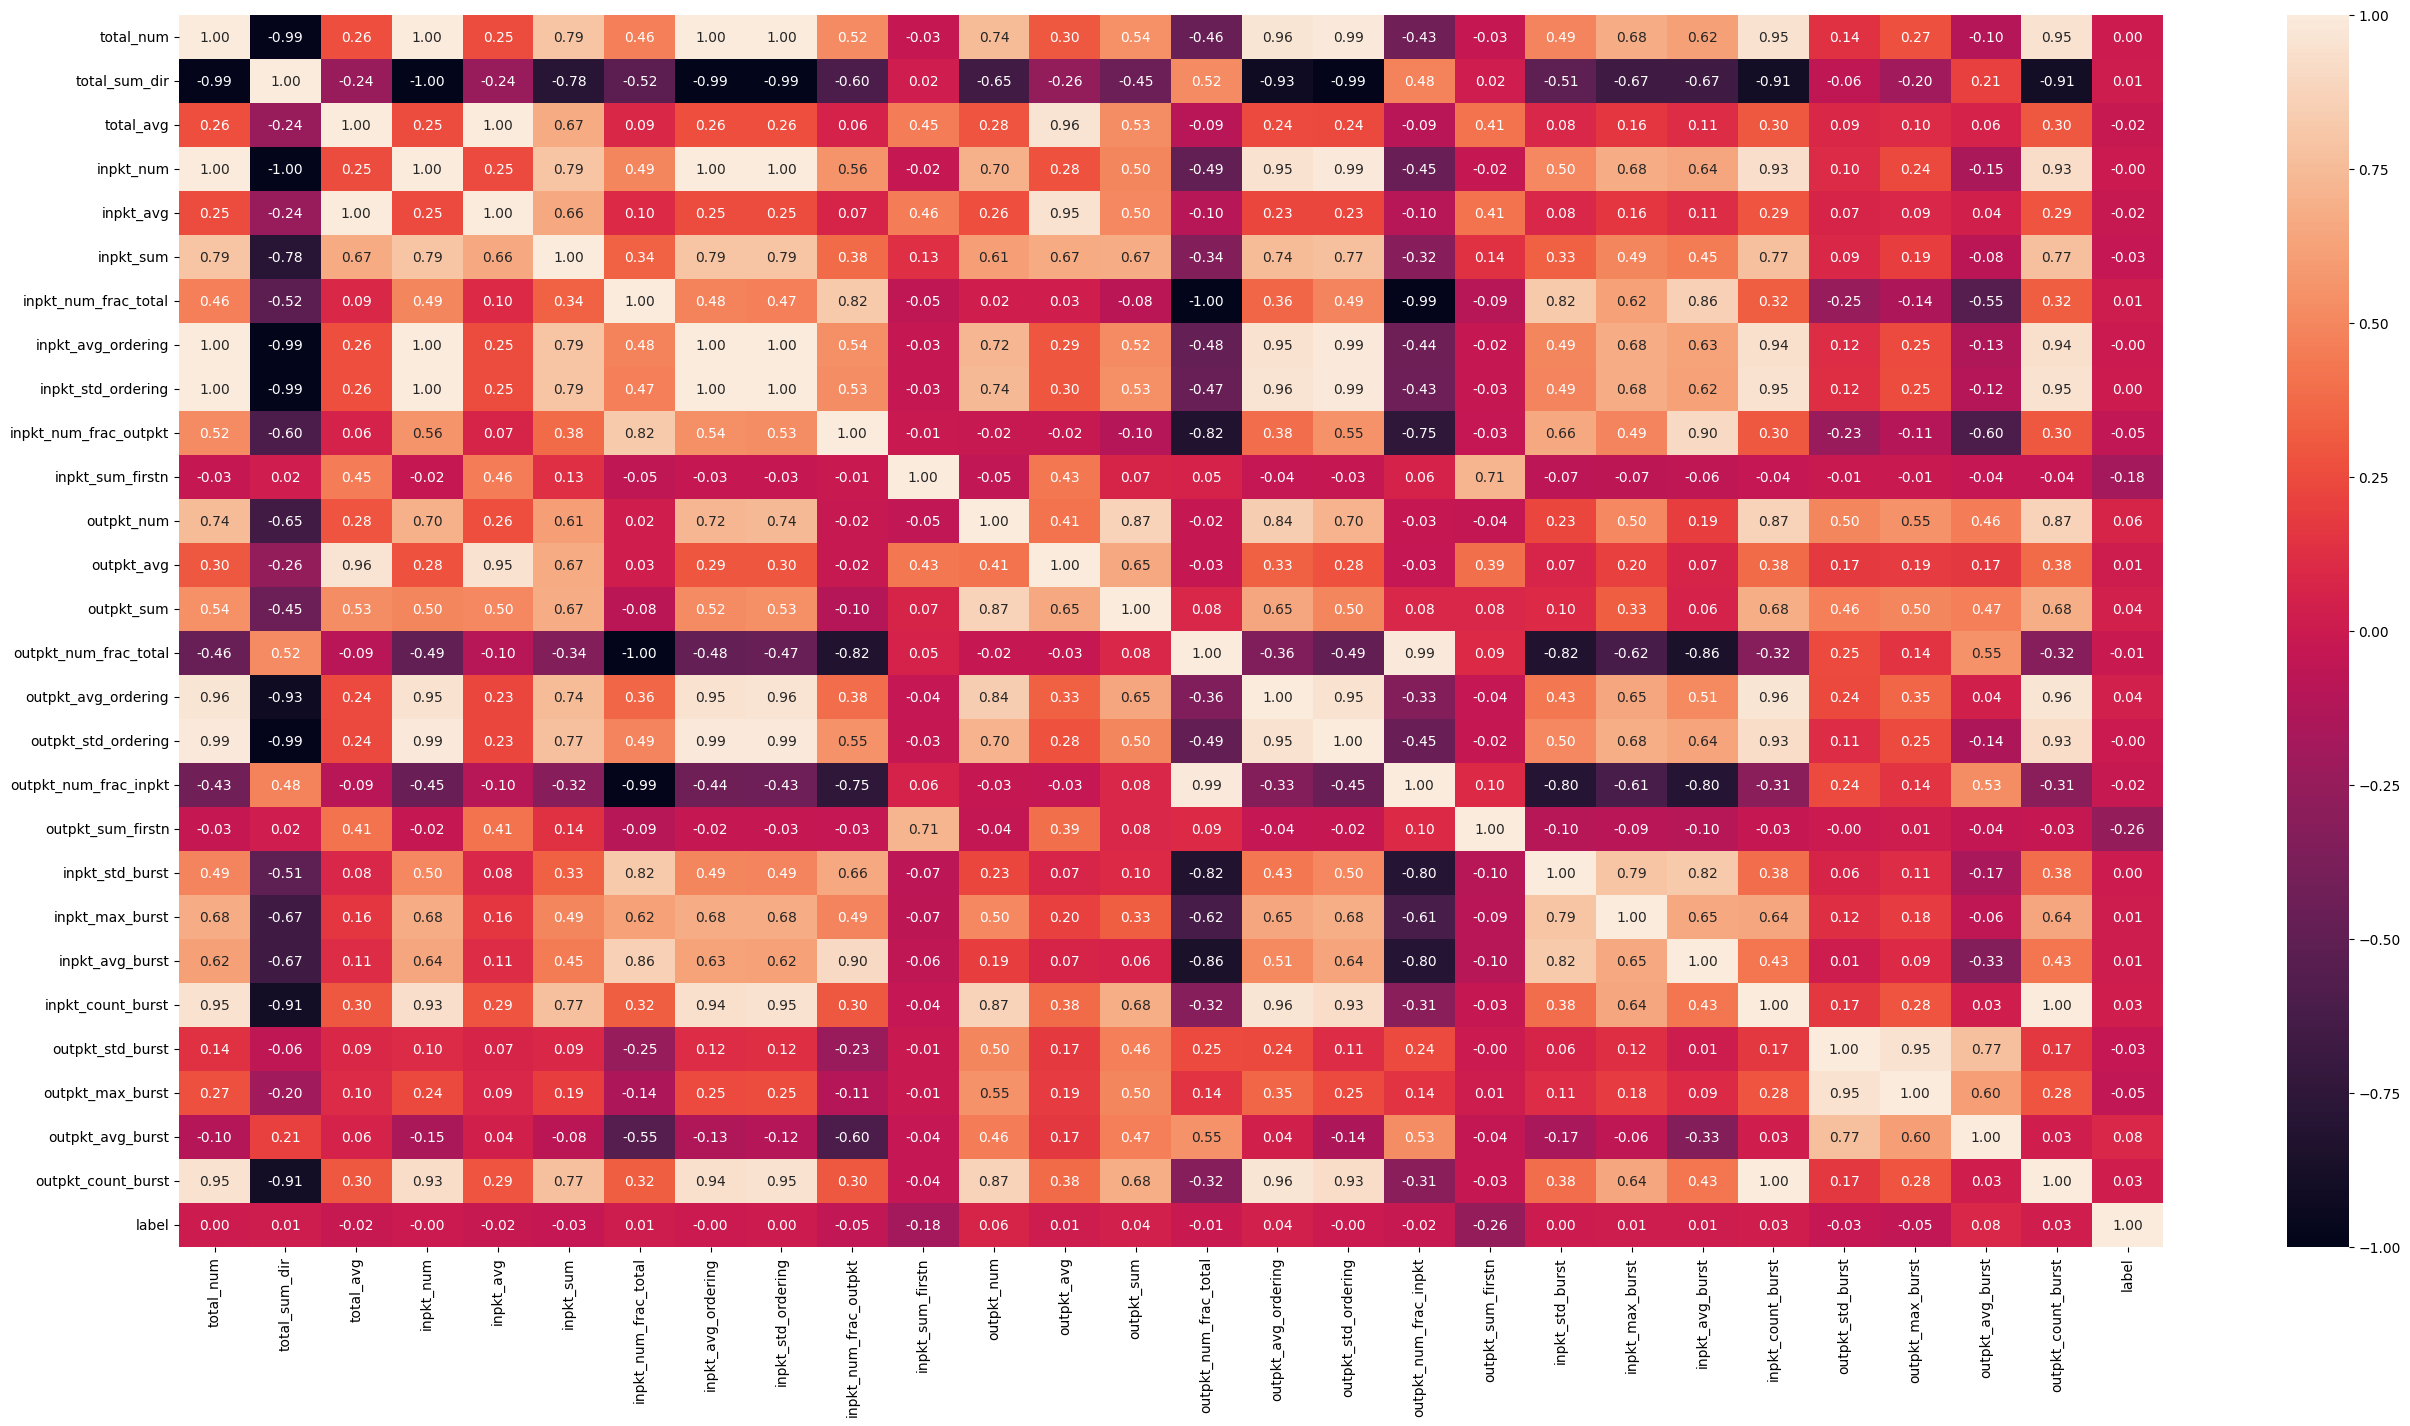

In [51]:
plt.figure(figsize=(32, 16))
corr = Xy.corr()
ax = sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [57]:
corr_y = abs(corr['label'])
cols = corr_y[corr_y>0.1]
print(cols)
print(cols.index)

inpkt_sum_firstn     0.184664
outpkt_sum_firstn    0.256394
label                1.000000
Name: label, dtype: float64
Index(['inpkt_sum_firstn', 'outpkt_sum_firstn', 'label'], dtype='object')


In [60]:
x = Xy[['inpkt_sum_firstn', 'outpkt_sum_firstn', 'label']]
       
x

,inpkt_sum_firstn,outpkt_sum_firstn,label
0,16.10,7.39,0
1,27.52,9.71,0
2,28.09,7.83,0
3,25.24,11.53,0
4,19.71,7.17,0
...,...,...,...
28995,48.06,17.30,-1
28996,75.71,42.56,-1
28997,30.53,17.90,-1
28998,48.14,20.69,-1


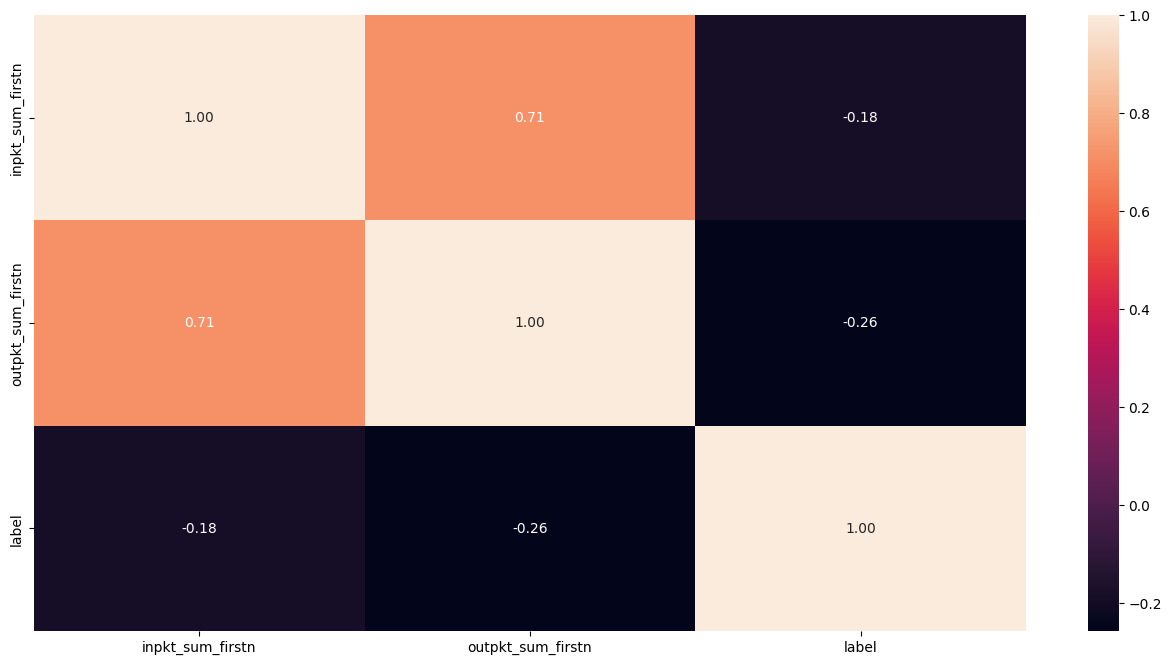

In [61]:
plt.figure(figsize=(16, 8))
ax = sns.heatmap(x.corr(), annot=True, fmt='.2f')
plt.show()